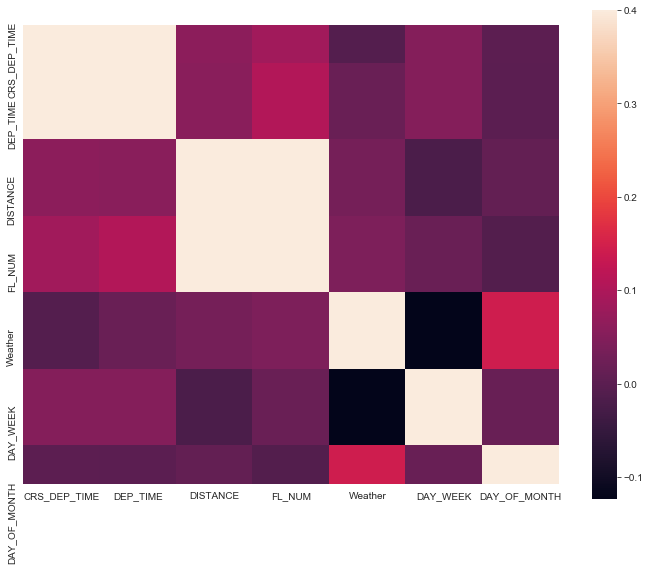

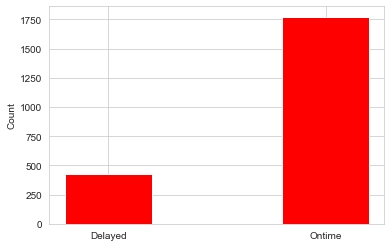

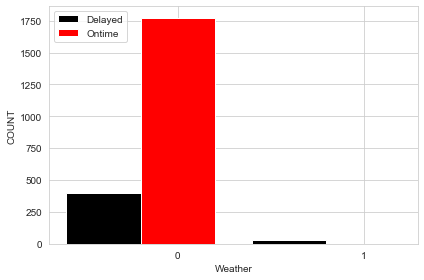

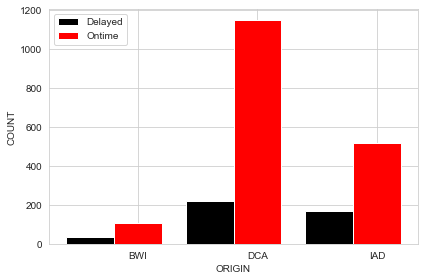

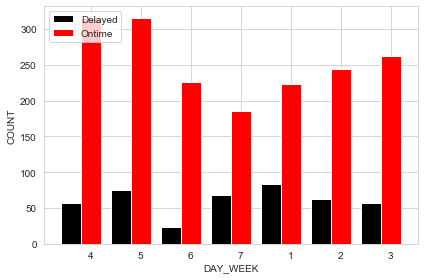

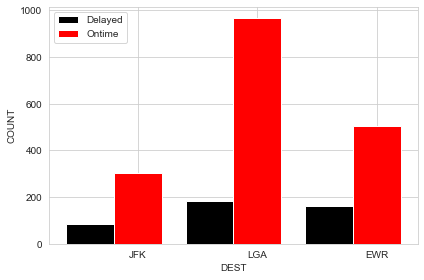

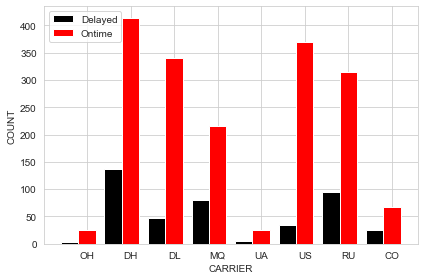

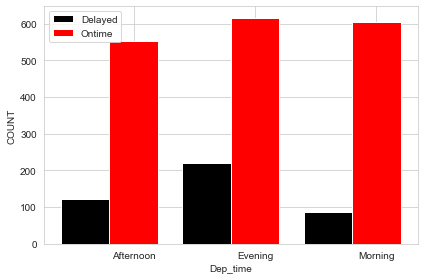

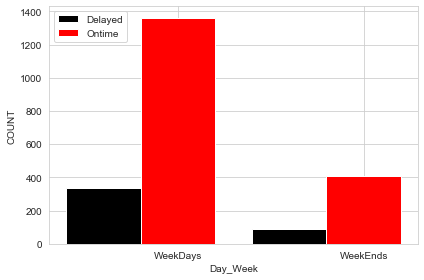

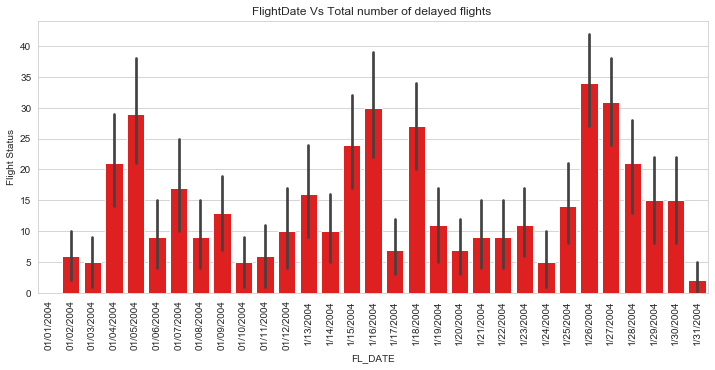

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
df = pd.read_csv("F:\\gnr652\\assignment-rw\\FlightDelays.csv")
data = pd.read_csv("F:\\gnr652\\assignment-rw\\FlightDelays.csv")

#correlation Matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
#generation of heatmap
sns.heatmap(corrmat, vmax=.4, square=True);
plt.show()

def impute_time(cols):
    if cols >= 600 and cols < 1200:
        return "Morning"
    elif cols >= 1200 and cols < 1600:
        return "Afternoon"
    else:
        return "Evening"

    
def impute_week(cols):
    if cols == 1 or cols == 2 or cols == 3 or cols == 4 or cols == 5:
        return "WeekDays"
    else: return "WeekEnds"
    
    
data['Dep_time'] = data["DEP_TIME"].apply(impute_time)
data['Day_Week'] = data["DAY_WEEK"].apply(impute_week)

#data.drop("DEP_TIME", axis = 1, inplace = True)
trainingData = data.loc[:, data.columns != 'Flight Status']
targetData = data.loc[:, data.columns == 'Flight Status']

ontime = len(targetData[targetData['Flight Status'] == 'ontime'])
delayed = len(targetData[targetData['Flight Status'] == 'delayed'])
y = [delayed, ontime]
x = np.arange(len(y))
bar_width = 0.40
plt.bar(x,y,bar_width,color = 'red')
plt.xticks(x, ['Delayed','Ontime'])
plt.ylabel('Count')
plt.show()

def plotArr_Delay(data, colName):
    carrierValues = trainingData[colName].unique()
    delayed = []
    ontime = []
    for val in carrierValues:
        delayed.append(sum(data[data[colName] == val]['Flight Status'] == 'delayed'))
        ontime.append(sum(data[data[colName] == val]['Flight Status'] == 'ontime'))
        
    x = np.arange(len(carrierValues))
    bar_width = 0.4

    rect1 = plt.bar(x, delayed, bar_width, color = 'black', label='Delayed')
    rect2 = plt.bar(x+bar_width, ontime, bar_width, color = 'r', label='Ontime')
    plt.xticks(x+bar_width, carrierValues)
    plt.xlabel(colName)
    plt.ylabel('COUNT')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
    




plotArr_Delay(data, 'Weather')
plotArr_Delay(data, 'ORIGIN')

plotArr_Delay(data, 'DAY_WEEK')
plotArr_Delay(data, 'DEST')
plotArr_Delay(data, 'CARRIER')
#plotArr_Delay(data, 'FL_DATE')


    
    

#print(data)

#print(trainingData)
plotArr_Delay(data, 'Dep_time')
plotArr_Delay(data, 'Day_Week')

df['Flight Status']=np.where(df['Flight Status']=='ontime', 0, df['Flight Status'])
df['Flight Status']=np.where(df['Flight Status']=='delayed', 1, df['Flight Status'])
sns.set_style('whitegrid')
plt.figure(figsize=(12, 5))
order = np.unique(list(df['FL_DATE']))
ax = sns.barplot(x='FL_DATE',y ='Flight Status', data=df, color = "red" , order = order , estimator = np.sum)
plt.xticks(rotation=90)
fig = plt.title("FlightDate Vs Total number of delayed flights ")

